In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import expit

In [18]:
class NeuralNetwork(object):
    
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        
        self.i_nodes = input_nodes
        self.h_nodes = hidden_nodes
        self.o_nodes = output_nodes
        self.lr = learning_rate
        
        self.ih_weights = np.random.uniform(.0, pow(self.h_nodes, -0.5), (self.h_nodes, self.i_nodes))
        self.ho_weights = np.random.uniform(.0, pow(self.o_nodes, -0.5), (self.o_nodes, self.h_nodes))
        
        self.activation_func = lambda x: expit(x)
        
    #forward propagation and back propagation
    def train(self, input_list, true_list):
        
        inputs = np.array(input_list, ndmin=2).T
        targets = np.array(true_list, ndmin=2).T
        
        hidden_inputs = np.dot(self.ih_weights, inputs)
        hidden_outputs = self.activation_func(hidden_inputs)
        
        final_inputs = np.dot(self.ho_weights, hidden_outputs)
        final_outputs = self.activation_func(final_inputs)
        
        #back propagation
        output_errors = targets - final_outputs
        hidden_errors =  np.dot(self.ho_weights.T, output_errors)
        
        self.ho_weights += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), \
                                            np.transpose(hidden_outputs))
        self.ih_weights += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), \
                                           np.transpose(inputs))
        
        
        pass
    
    
    def query(self, input_list):
        
        inputs = np.array(input_list, ndmin=2).T
        
        hidden_inputs = np.dot(self.ih_weights, inputs)
        hidden_outputs = self.activation_func(hidden_inputs)
        
        final_inputs = np.dot(self.ho_weights, hidden_outputs)
        final_outputs = self.activation_func(final_inputs)
        
        return final_outputs
        
        

In [19]:
INPUT_NODES = 3
HIDDEN_NODES = 3
OUTPUT_NODES = 3
learning_rate = 0.5


nn = NeuralNetwork(INPUT_NODES, HIDDEN_NODES, OUTPUT_NODES, learning_rate)

In [23]:
nn.query([1.1, 2.1, 3.2])

array([[0.6595137 ],
       [0.63516321],
       [0.71041564]])

In [26]:
test_x = [
    [1, 0, 0],
    [0, 1, 0],
    [1, 1, 0],
    [0, 0, 0]
]

test_y = [
    [1, 0, 0],
    [1, 0, 0],
    [0, 1, 0],
    [0, 1, 0]
]

nn.train(test_x, test_y)

In [53]:
need_length = 1000

with open('data/mnist_test.csv', 'r') as f:
    mnist_y = []
    mnist_x = []
    for i in range(need_length):
        row = f.readline().split(',')
        mnist_y.append(row[0])
        mnist_x.append(row[1:])

label is 7
pic show below:


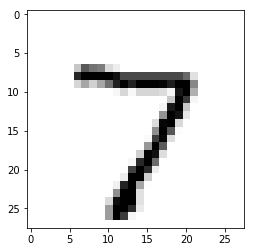

In [43]:
label, image_arr = mnist_y[0], np.array(mnist_x[0], dtype=np.float).reshape((28, 28))

print('label is {0}\npic show below:'.format(label))
plt.imshow(image_arr, cmap='Greys', interpolation='None')

In [64]:
INPUT_NODES = 28*28
HIDDEN_NODES = 100
OUTPUT_NODES = 10
learning_rate = 0.2

EPOCHS = 5

train_size = 900
test_size = 100

mnist_nn = NeuralNetwork(INPUT_NODES, HIDDEN_NODES, OUTPUT_NODES, learning_rate)

for epoch in range(EPOCHS):
    for i in range(train_size):

        inputs = np.array(mnist_x[i], dtype=np.float) / 255 * 0.99 + 0.01
        label = np.zeros(OUTPUT_NODES) + 0.01
        label[int(mnist_y[i])] = 0.99

        mnist_nn.train(inputs, label)

label is 2
pic show below:


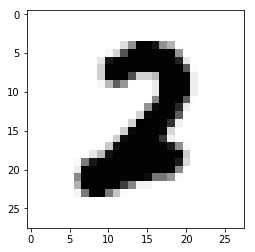

In [47]:
label, image_arr = mnist_y[-1], np.array(mnist_x[-1], dtype=np.float).reshape((28, 28))

print('label is {0}\npic show below:'.format(label))
plt.imshow(image_arr, cmap='Greys', interpolation='None')

In [48]:
mnist_nn.query(np.array(mnist_x[-1], dtype=np.float) / 255 * 0.99 + 0.01)

array([[0.06449373],
       [0.12507696],
       [0.07998952],
       [0.11906302],
       [0.09870295],
       [0.06044849],
       [0.11421726],
       [0.15476643],
       [0.05255146],
       [0.10335958]])

In [67]:
def test_score():
    err = 0
    for i in range(test_size):
        target = int(mnist_y[-i])
        pred_prob = mnist_nn.query(np.array(mnist_x[-i], dtype=np.float) / 255 * 0.99 + 0.01)
        pred = np.argmax(pred_prob)
        
        if target != pred:
            print('true {0}, pred {1}'.format(target, pred))
            err += 1
    
    return err, err/test_size

print('error (numbers, rate) : ({0})'.format(test_score()))

true 2, pred 7
true 3, pred 8
true 2, pred 3
true 3, pred 5
true 1, pred 6
true 7, pred 2
true 8, pred 9
true 3, pred 7
true 6, pred 2
true 2, pred 0
true 3, pred 5
true 8, pred 5
true 5, pred 8
true 2, pred 4
true 2, pred 7
true 2, pred 1
true 8, pred 3
true 7, pred 9
error (numbers, rate) : ((18, 0.18))


In [42]:
def train_test_split(X, y, rate=0.3):
    
    test_idx = np.random.choice(len(y), replace=False)
    
    pass

('7',
 ['0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
